***

### 1b

Follow the instructions in src/p01b logreg.py to train a logistic regression classiﬁer using Newton’s Method. Starting with θ = ~0, run Newton’s Method until the updates to θ are small: Speciﬁcally, train until the ﬁrst iteration k such that ‖θk − θk−1‖1 < , where  = 1 × 10−5. Make sure to write your model’s predictions to the ﬁle speciﬁed in the code.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'

x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

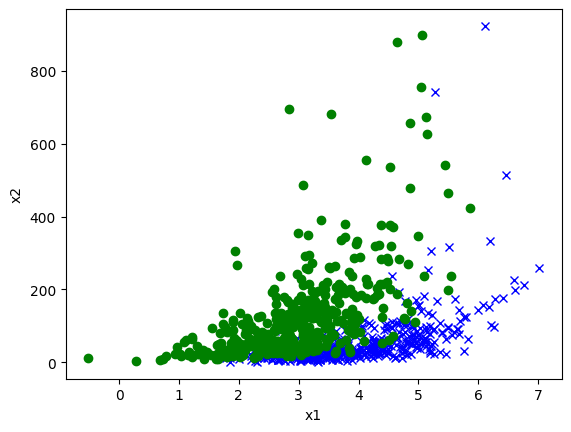

In [80]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)


In [76]:
def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # *** END CODE HERE ***


class LogisticRegression(LinearModel):
    def fit(self, x, y):

        def h(theta, x):
         
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):

            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        def hessian(theta, x):

            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):

            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        new_theta = self.theta
        count = 1

        # Update theta using Newton's Method
        while True:

            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

            print("step ", count)
            print("    values of theta are", new_theta)
            count += 1

            if np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
                break

        self.theta = new_theta
      

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        return x @ self.theta >= 0


In [77]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

step  1
    values of theta are [-3.2043369   1.15293034 -0.00915559]


Theta is:  [-3.2043369   1.15293034 -0.00915559]
The accuracy on training set is:  0.0


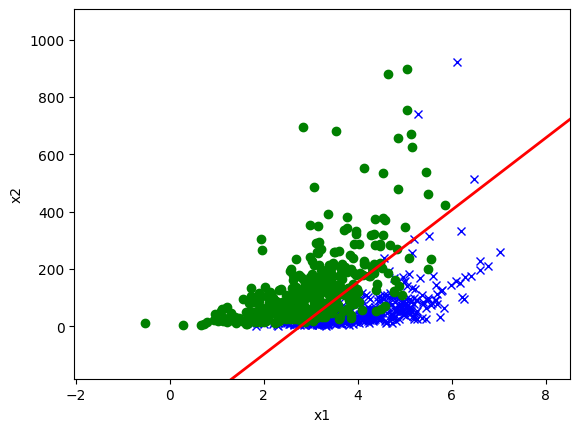

In [79]:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))

The accuracy on validation set is:  0.0


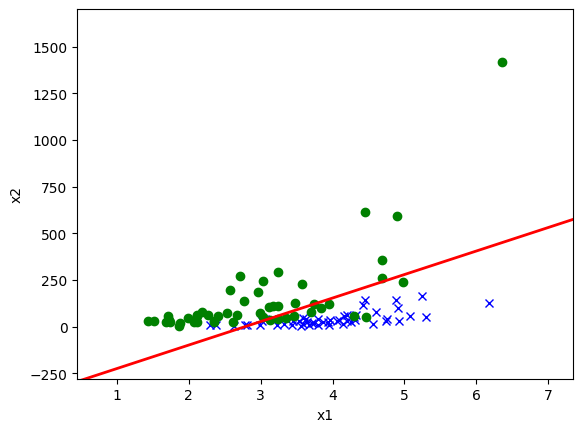

In [78]:
util.plot(x_valid, y_valid, log_reg.theta)
print("The accuracy on validation set is: ", np.mean(log_reg.predict(x_valid) == y_valid))